# Project Title: Data Analyst Jobs Scraping, Analysis and Visualization

## Problem Overview

We will be answering the following questions in this project;

Which skills are the most demanded among companies, relative to the Level of employment (Senior, Mid, Executive, Entry)?

which data analytics related position and level has the highest job placements?

Which job type is suitable (Full time, Part time, Hybrid)?

How likely is it to be employed as a remote or onsite analyst?

Which companies have the highest number of job posts?

I scraped a job posting portal, [ai-jobs.net](https://ai-jobs.net) for Data Analytics related jobs, with the BeautifulSoup web scraping tool and Python Programming Language. The following are the scraped details:
* Job Ttile - The name of the available job
* Company Name - The name of the company with the job vacancy
* Location - It contains the Physical Location of the company and if the job is remote
* Level - It's the Job level, if it is a junior, mid or senior role
* Job Type - Is the job a full-time or internship role
* Salary Range - The pay range (some columns are in yearly range, while some are in hourly range)
* Required Skills - Necessary skills an applicant must have before applying
* Benefits - The benefits that comes with the job

In [428]:
#import needed libraries

#data sraping
from bs4 import BeautifulSoup
import requests
import urllib.parse 

# data manipulation
import pandas as pd
import numpy as np

# Import visualization libraries
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,  6)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [429]:
#store website into a variable "webUrl"

webUrl = 'https://ai-jobs.net/analyst-jobs/'


In [430]:
#make request to the website specified above

response = requests.get(webUrl)

In [431]:
#confirm if the request made was successful

response.status_code

200

In [432]:
#create a soup object to get access to the html content of the website

soup = BeautifulSoup(response.content, 'html.parser')

In [434]:
#start to store the website content in a variable 

results = soup.find('div', {'class':'list-group list-group-flush mb-5'}).find_all('a', {'class':'col list-group-item-action px-2 py-3'})

#### pulling out content from each index of the list

In [436]:
# Job Title

print("Job Title : \n" + results[0].find('h2', {'class':'h4 mb-1'}).get_text()+ "\n")

# Company

print("Company : \n" + results[0].find('p', {'class':'m-0 text-muted job-list-item-company'}).get_text()+ "\n")

# Location

print("Location : \n" + results[0].find('span', {'class':'d-none d-md-block text-break job-list-item-location'}).get_text()+ "\n")

# Level

print("Level : \n" + results[4].find('span', {'class':'badge badge-info badge-pill my-md-1 d-none d-md-inline-block'}).get_text()+ "\n")

# Job Type

print("Job Type : \n" + results[0].find('span', {'class':'badge badge-secondary badge-pill my-md-1'}).get_text()+ "\n")

# Salary Range

print("Salary Range : \n" + results[4].find('span', {'class':'badge badge-success badge-pill d-none d-md-inline-block'}).get_text()+ "\n")

Job Title : 
Data Analyst

Company : 
Security Bank

Location : 
Makati, Makati, Philippines

Level : 
Senior-level

Job Type : 
Full Time

Salary Range : 
USD 46K - 85K *



In [437]:
# Skills

[x.get_text() for x in results[0].find_all('span', 'badge badge-light badge-pill')]

['Banking', 'Excel', 'KPIs', 'Power BI', 'PySpark', 'Python', 'SAS', '+2']

In [438]:
# Benefits

[i.get_text() for i in results[0].find_all('span', 'badge badge-success badge-pill')]

[]

In [439]:
#create an empty list

Job_title = []
Company = []
Location = []
Level = []
Job_type = []
Salary = []
Skill = []
Benefit = []

In [440]:
#Create a for loop that will loop through the rows and append the data extracted to the list created
for result in results:
    try:
        Job_title.append(result.find('h2', {'class':'h4 mb-1'}).get_text()) 
    except:
        Job_title.append('n/a')
        
    try:
        Company.append(result.find('p', {'class':'m-0 text-muted job-list-item-company'}).get_text()) 
    except:
        Company.append('n/a')
        
    try:
        Location.append(result.find('span', {'class':'d-none d-md-block text-break job-list-item-location'}).get_text()) 
    except:
        Location.append('n/a')
        
    try:
        Level.append(result.find('span', {'class':'badge badge-info badge-pill my-md-1 d-none d-md-inline-block'}).get_text()) 
    except:
        Level.append('n/a')
        
    try:
        Job_type.append(result.find('span', {'class':'badge badge-secondary badge-pill my-md-1'}).get_text()) 
    except:
        Job_type.append('n/a')
    
    try:
        Salary.append(result.find('span', {'class':'badge badge-success badge-pill d-none d-md-inline-block'}).get_text()) 
    except:
        Salary.append('n/a')
    
    try:
        Skill.append([x.get_text() for x in result.find_all('span', 'badge badge-light badge-pill')])
    except:
        Skill.append('n/a')
    
    try:
        Benefit.append([x.get_text() for x in result.find_all('span', 'badge badge-success badge-pill')])
    except:
        Benefit.append('n/a')

In [441]:
#give column header names to each columns
analysts = pd.DataFrame({'Job Title': Job_title, 'Company': Company, 'Location': Location, 'Level': Level,
                        'Job Type': Job_type, 'Salary Range': Salary, 'Required Skills': Skill, 'Benefits': Benefit})

In [442]:
#export the dataframe to excel

analysts.to_excel('analyst.xlsx', index=False)

## Exploratory Data Analysis

In [443]:
## reading cleaned dataset in csv format.

df = pd.read_csv('C:/Users/Lenovo/Desktop/GitHub Projects/SCRABING/--NEW --/DA JOBS/cleanData.csv')


### Understanding the data

In [444]:
df.head()

,Job_Title,Company,Location,Level,Job_Type,Salary_Range,Required_Skills,Benefits,Onsite_Remote
0,Data Analyst,"Take-Two Interactive Software, Inc.","New York City, United States",Senior-level,Full Time,USD 50K - 85K,"Data management, ETL, Excel, SQL, Tableau",Team events,Onsite
1,"Data Analyst, Federal Civilian (remote)",Ad Hoc,"Washington, DC",Senior-level,Full Time,USD 81K - 115K,"Data analysis, Python, R, Security, SQL, UX","k matching, Career development, Health care, I...",Onsite
2,Global Data Analyst - People HR - Night Shifts...,Guidewire Software,India - Bengaluru,NaN,Full Time,USD 50K - 85K,"Data analysis, Data Analytics, Data management...",Career development,Onsite
3,Data Analyst | Global Analytics Team,Gympass,"New York, US (remote)",Senior-level,Full Time,USD 50K - 85K,"Airflow, SQL","Career development, Fitness gym, Flex hours, ...",Remote
4,Data Analyst,SumUp,"Berlin, Germany",Senior-level,Full Time,USD 50K - 85K,"Airflow, AWS, Data pipelines, FinTech, FiveTra...","Flex vacation, Startup environment, Team events",Onsite


.head() returns the first 5 rows of my dataset. This is useful if you want to see some example values for each variable.

In [445]:
df.tail()

,Job_Title,Company,Location,Level,Job_Type,Salary_Range,Required_Skills,Benefits,Onsite_Remote
195,Regional Senior Data Analytics Engineer,Ninja Van,"Kuala Lumpur, Malaysia",Senior-level,Full Time,Not Disclosed,"Airflow, APIs, Computer Science, Data analysis...",NaN,Onsite
196,"Analytics Engineering Intern, Data Science & E...",Netflix,"Los Gatos, California",Senior-level,Internship,Not Disclosed,"Big Data, Business Analytics, Computer Science...",Flex hours,Onsite
197,2023 Summer Data Analytics Intern (Undergradua...,Flexport,Amsterdam,Entry-level,Internship,Not Disclosed,"Business Analytics, Computer Science, Data Ana...",Team events,Onsite
198,Senior Analytics Engineer,GlossGenius,Remote - USA,Senior-level,Full Time,Not Disclosed,"Business Intelligence, Data Warehousing, Engin...","Career development, Fertility benefits, Flex h...",Remote
199,Finance Data Analyst,Zego,"London, England, United Kingdom",Mid-level,Full Time,Not Disclosed,"Business Intelligence, Excel, Finance, Looker,...",Insurance,Onsite


In [446]:
df.shape

(200, 9)

.shape returns the number of rows by the number of columns for my dataset. The output (200, 8), means the dataset has 200 rows and 8 columns.

In [447]:
df.columns.values

array(['Job_Title', 'Company', 'Location', 'Level', 'Job_Type',
       'Salary_Range', 'Required_Skills', 'Benefits', 'Onsite_Remote'],
      dtype=object)

.columns returns all 8 column names of the dataset.

In [448]:
#Basic information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Job_Title        200 non-null    object
 1   Company          200 non-null    object
 2   Location         200 non-null    object
 3   Level            182 non-null    object
 4   Job_Type         200 non-null    object
 5   Salary_Range     172 non-null    object
 6   Required_Skills  200 non-null    object
 7   Benefits         174 non-null    object
 8   Onsite_Remote    200 non-null    object
dtypes: object(9)
memory usage: 14.2+ KB


.info() provides Key information related to the dataset. 
8 columns, number of enteries (200 rows), and data types (objects)

### Cleaning the data

In [449]:
df.isnull().sum()

Job_Title           0
Company             0
Location            0
Level              18
Job_Type            0
Salary_Range       28
Required_Skills     0
Benefits           26
Onsite_Remote       0
dtype: int64

In [450]:
df = df.dropna()

In [451]:
len(df)

139

### Univariate Analysis

In [452]:
locations = df['Job_Type'].value_counts()
locations = dict(locations)
list1 = locations.keys()
list2 = locations.values()

In [453]:
pd.DataFrame(list(zip(list1,list2)))


,0,1
0,Full Time,136
1,Internship,3


In [454]:
locations_df = pd.DataFrame(list(zip(list1,list2)), columns=['Job Types','count'])
fig = px.histogram(locations_df[0:20],y='Job Types', x='count',orientation='h', pattern_shape_sequence=[".", "x", "+"],
            labels={'count':'Count'}, color='count') 
fig.update_traces(textposition='outside')
fig.update_layout(title_text="<b> Count of Job Types </b>",
                 title_font_size=20,
                 title_font_color='gray',
                 title_font_family='Titillium Web',
                 title_x=0.4,
                 title_y=0.95,
                 title_xanchor='center',
                 title_yanchor='top',
                 yaxis={'categoryorder':'total ascending'}
                 )


In [455]:
locations = df['Level'].value_counts()
locations = dict(locations)
list1 = locations.keys()
list2 = locations.values()

In [456]:
pd.DataFrame(list(zip(list1,list2)))

,0,1
0,Senior-level,98
1,Mid-level,30
2,Entry-level,9
3,Executive-level,2


In [457]:
locations_df = pd.DataFrame(list(zip(list1,list2)), columns=['Employment Levels','count'])
fig = px.histogram(locations_df[0:20],y='Employment Levels', x='count',orientation='h',  pattern_shape_sequence=[".", "x", "+"],
            labels={'count':'Count'}, color='count') 
fig.update_traces(textposition='outside')
fig.update_layout(title_text="<b> Count of Employment Levels </b>",
                 title_font_size=20,
                 title_font_color='gray',
                 title_font_family='Titillium Web',
                 title_x=0.4,
                 title_y=0.95,
                 title_xanchor='center',
                 title_yanchor='top',
                 yaxis={'categoryorder':'total ascending'}
                 )

In [458]:
df1 = df["Job_Title"].value_counts().reset_index()
df2 = df1.iloc[:10]


In [459]:
df2

,index,Job_Title
0,Senior Data Analyst,22
1,Data Analyst,16
2,"Data Scientist, Analytics - Trust & Safety",4
3,Analytics Engineer,3
4,Senior Analytics Engineer,3
5,"Senior Data Analyst, Partner Development - (St...",2
6,Data Analyst - (Remote - US),2
7,Data Analyst | Global Analytics Team,2
8,"Data Analyst, Strategic Partnerships( Bangkok ...",2
9,"Risk Data Analyst, Fraud",2


In [460]:
fig = px.pie(df2, values='Job_Title', names='index', title= 'Distribution of job positions',
            color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.show()

In [461]:
df1 = df["Company"].value_counts().reset_index()
df2 = df1.iloc[:10]


In [462]:
df2

,index,Company
0,Agoda,12
1,Hotel Engine,6
2,sennder,4
3,Financial Times,4
4,Amazon.com,4
5,SafetyCulture,2
6,Rockstar Games,2
7,"TechFlow, Inc",2
8,Farfetch,2
9,Proxymity,2


In [463]:
fig = px.pie(df2, values='Company', names='index', title= 'Distribution of Companies',
            color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.show()

### Bivariate Analysis

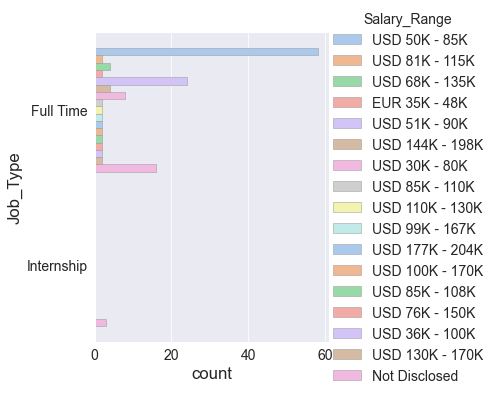

In [550]:
sns.catplot(
    data=df, y="Job_Type", hue="Salary_Range", kind="count",
    palette="pastel", edgecolor=".6",
)

In [471]:
fig = px.bar(df, x="Level", y="Job_Type", color="Level", text="Level",  pattern_shape_sequence=[".", "x", "+"], title="Levels of Employments Grouped By Job Types")
fig.show()

In [556]:
fig = px.bar(df, x='Onsite_Remote', color="Level", title="Onsite/Remote Posibities by Employment Levels")
fig.show()

In [263]:
fig = px.bar(df, x="Level",
             color='Company', barmode='group', title="Levels of Employments Grouped By Companies",
             height=400)
fig.update_layout(
                 title_font_size=20,
                 title_font_color='gray',
                 title_font_family='Titillium Web',
                 title_x=0.4,
                 title_y=0.85,
                 title_xanchor='center',
                 title_yanchor='top',
                 yaxis={'categoryorder':'total ascending'}
                 )
fig.show()

In [497]:
fig = px.histogram(df, x="Level", 
             color='Salary_Range', barmode='group',
             histfunc='avg',
             pattern_shape_sequence=[".", "x", "+"],
             height=400)
fig.update_layout(
                 title="Levels of Employments By Salary",
                 title_font_size=20,
                 title_font_color='gray',
                 title_font_family='Titillium Web',
                 title_x=0.4,
                 title_y=0.95,
                 title_xanchor='center',
                 title_yanchor='top',
                 yaxis={'categoryorder':'total ascending'}
                 )
fig.show()


In [514]:
fig = px.histogram(df, x="Company", 
             color='Salary_Range', barmode='group',
             histfunc='avg',
             height=500)
fig.update_layout(
                 title="Companies Grouped By Salaries",
                 title_font_size=20,
                 title_font_color='gray',
                 title_font_family='Titillium Web',
                 title_x=0.4,
                 title_y=0.95,
                 title_xanchor='center',
                 title_yanchor='top',
                 xaxis={'categoryorder':'total ascending'}
                 )
fig.show()

In [522]:
fig = px.bar(df, x="Level", color="Location",
                 title="Levels of Employment by Location")
fig.show()

In [518]:

fig = px.histogram(df, x="Company", title="Companies by Location",
             color="Location", barmode='group',
             histfunc='avg',
             height=500)
fig.update_layout(
                 title_font_size=20,
                 title_font_color='gray',
                 title_font_family='Titillium Web',
                 title_x=0.4,
                 title_y=0.95,
                 title_xanchor='center',
                 title_yanchor='top',
                 xaxis={'categoryorder':'total descending'}
                 )
fig.show()

### Multivariate Analysis

In [560]:
fig = px.bar(df, x="Company", y="Salary_Range", color="Location", text="Location", 
                 title="Company, Salary ranges By Location"
                 )
fig.show()

## Recommendation

A detailed data analysis is done from a scrapped dataset. It can be concluded that:

- If you wish to relocate to Europe, Berlin in Germany provides more job placements. However, globally New York City provides the most jobs (remote and onsite).

- There is high senior level job placements, but there are more skill requirements for employability. It strongly suggest more training, targeting the outlined skills in the insights section. Nevertheless, it is equally advisable to start with an entry or mid level position and learn these skills practically while growing professionally.

- It would be easier to find an onsite/Full time jobs, hence I propose its preferable to make yourself fully available, and look up jobs in environments where relocating will not be a problem.